In [4]:
#Importing all the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statistics 
import math
import random
import pingouin as pg  #For tttest

In [5]:
# Loading data from the provided dataset  

df=pd.read_csv('clean_kaggle_data.csv')

In [6]:
# First 5 information set of the dataframe
df.head() 

Unnamed: 0  Time from Start to Finish (seconds)     Q1    Q2  \
0           0                                  510  22-24  Male   
1           1                                  423  40-44  Male   
2           3                                  391  40-44  Male   
3           4                                  392  22-24  Male   
4           5                                  470  50-54  Male   

   Q2_OTHER_TEXT         Q3                   Q4                 Q5  \
0             -1     France      Master’s degree  Software Engineer   
1             -1      India  Professional degree  Software Engineer   
2             -1  Australia      Master’s degree              Other   
3             -1      India    Bachelor’s degree              Other   
4             -1     France      Master’s degree     Data Scientist   

   Q5_OTHER_TEXT                    Q6  ... Q34_Part_4 Q34_Part_5 Q34_Part_6  \
0             -1  1000-9,999 employees  ...        NaN        NaN        NaN   
1             -1    > 10,000 employees  ...        NaN        NaN        NaN   
2              0    > 10,000 employees  ...        NaN        NaN        NaN   
3              1        0-49 employees  ...        NaN        NaN        NaN   
4             -1        0-49 employees  ...        NaN        NaN        NaN   

                        Q34_Part_7 Q34_Part_8          Q34_Part_9 Q34_Part_10  \
0                              NaN        NaN                 NaN         NaN   
1                              NaN        NaN                 NaN         NaN   
2                              NaN        NaN  Azure SQL Database         NaN   
3                              NaN        NaN                 NaN         NaN   
4  AWS Relational Database Service        NaN                 NaN         NaN   

  Q34_Part_11 Q34_Part_12 Q34_OTHER_TEXT  
0         NaN         NaN             -1  
1         NaN         NaN             -1  
2         NaN         NaN             -1  
3         NaN         NaN             -1  
4         NaN         NaN             -1  

[5 rows x 247 columns]

In [7]:
#Assigning proper names to the columns labels and taking important data for consideration only
df1=df.rename(columns={'Q3':'Country','Q1':'Age','Q5':'Profession','Q2':'Gender','Q10':'Salary','Q4':'Highest Level Of Formal Education','Q15':'Professional Experience'})
df_final=df1[['Country','Age','Profession','Gender','Highest Level Of Formal Education','Salary','Professional Experience']]
df_final.head()

Country    Age         Profession Gender  \
0     France  22-24  Software Engineer   Male   
1      India  40-44  Software Engineer   Male   
2  Australia  40-44              Other   Male   
3      India  22-24              Other   Male   
4     France  50-54     Data Scientist   Male   

  Highest Level Of Formal Education  Salary    Professional Experience  
0                   Master’s degree   40000                  1-2 years  
1               Professional degree    7500  I have never written code  
2                   Master’s degree  300000                  1-2 years  
3                 Bachelor’s degree    5000                  < 1 years  
4                   Master’s degree   70000                  20+ years

## Question 1

### Perform exploratory data analysis to analyze the survey dataset and to summarize its main characteristics. Present 3 graphical figures that represent different trends in the data. For your explanatory data analysis, you can consider Country, Age, Education, Professional Experience, and Salary.

In [8]:
#First data analysis is wrt gender and its related profession.

#Unique values or types of profession in 'Profession' column 
profession=df_final[['Profession']]
def unique(profession):
    x0=np.array(profession)
    print(np.unique(x0))
    
unique(profession)  #All the profession mentioned in the dataset

['Business Analyst' 'DBA/Database Engineer' 'Data Analyst' 'Data Engineer'
 'Data Scientist' 'Other' 'Product/Project Manager' 'Research Scientist'
 'Software Engineer' 'Statistician']


['Male - Software Engineer' 'Male - Software Engineer' 'Male - Other' ...
 'Male - Other' 'Male - Statistician' 'Male - Software Engineer']


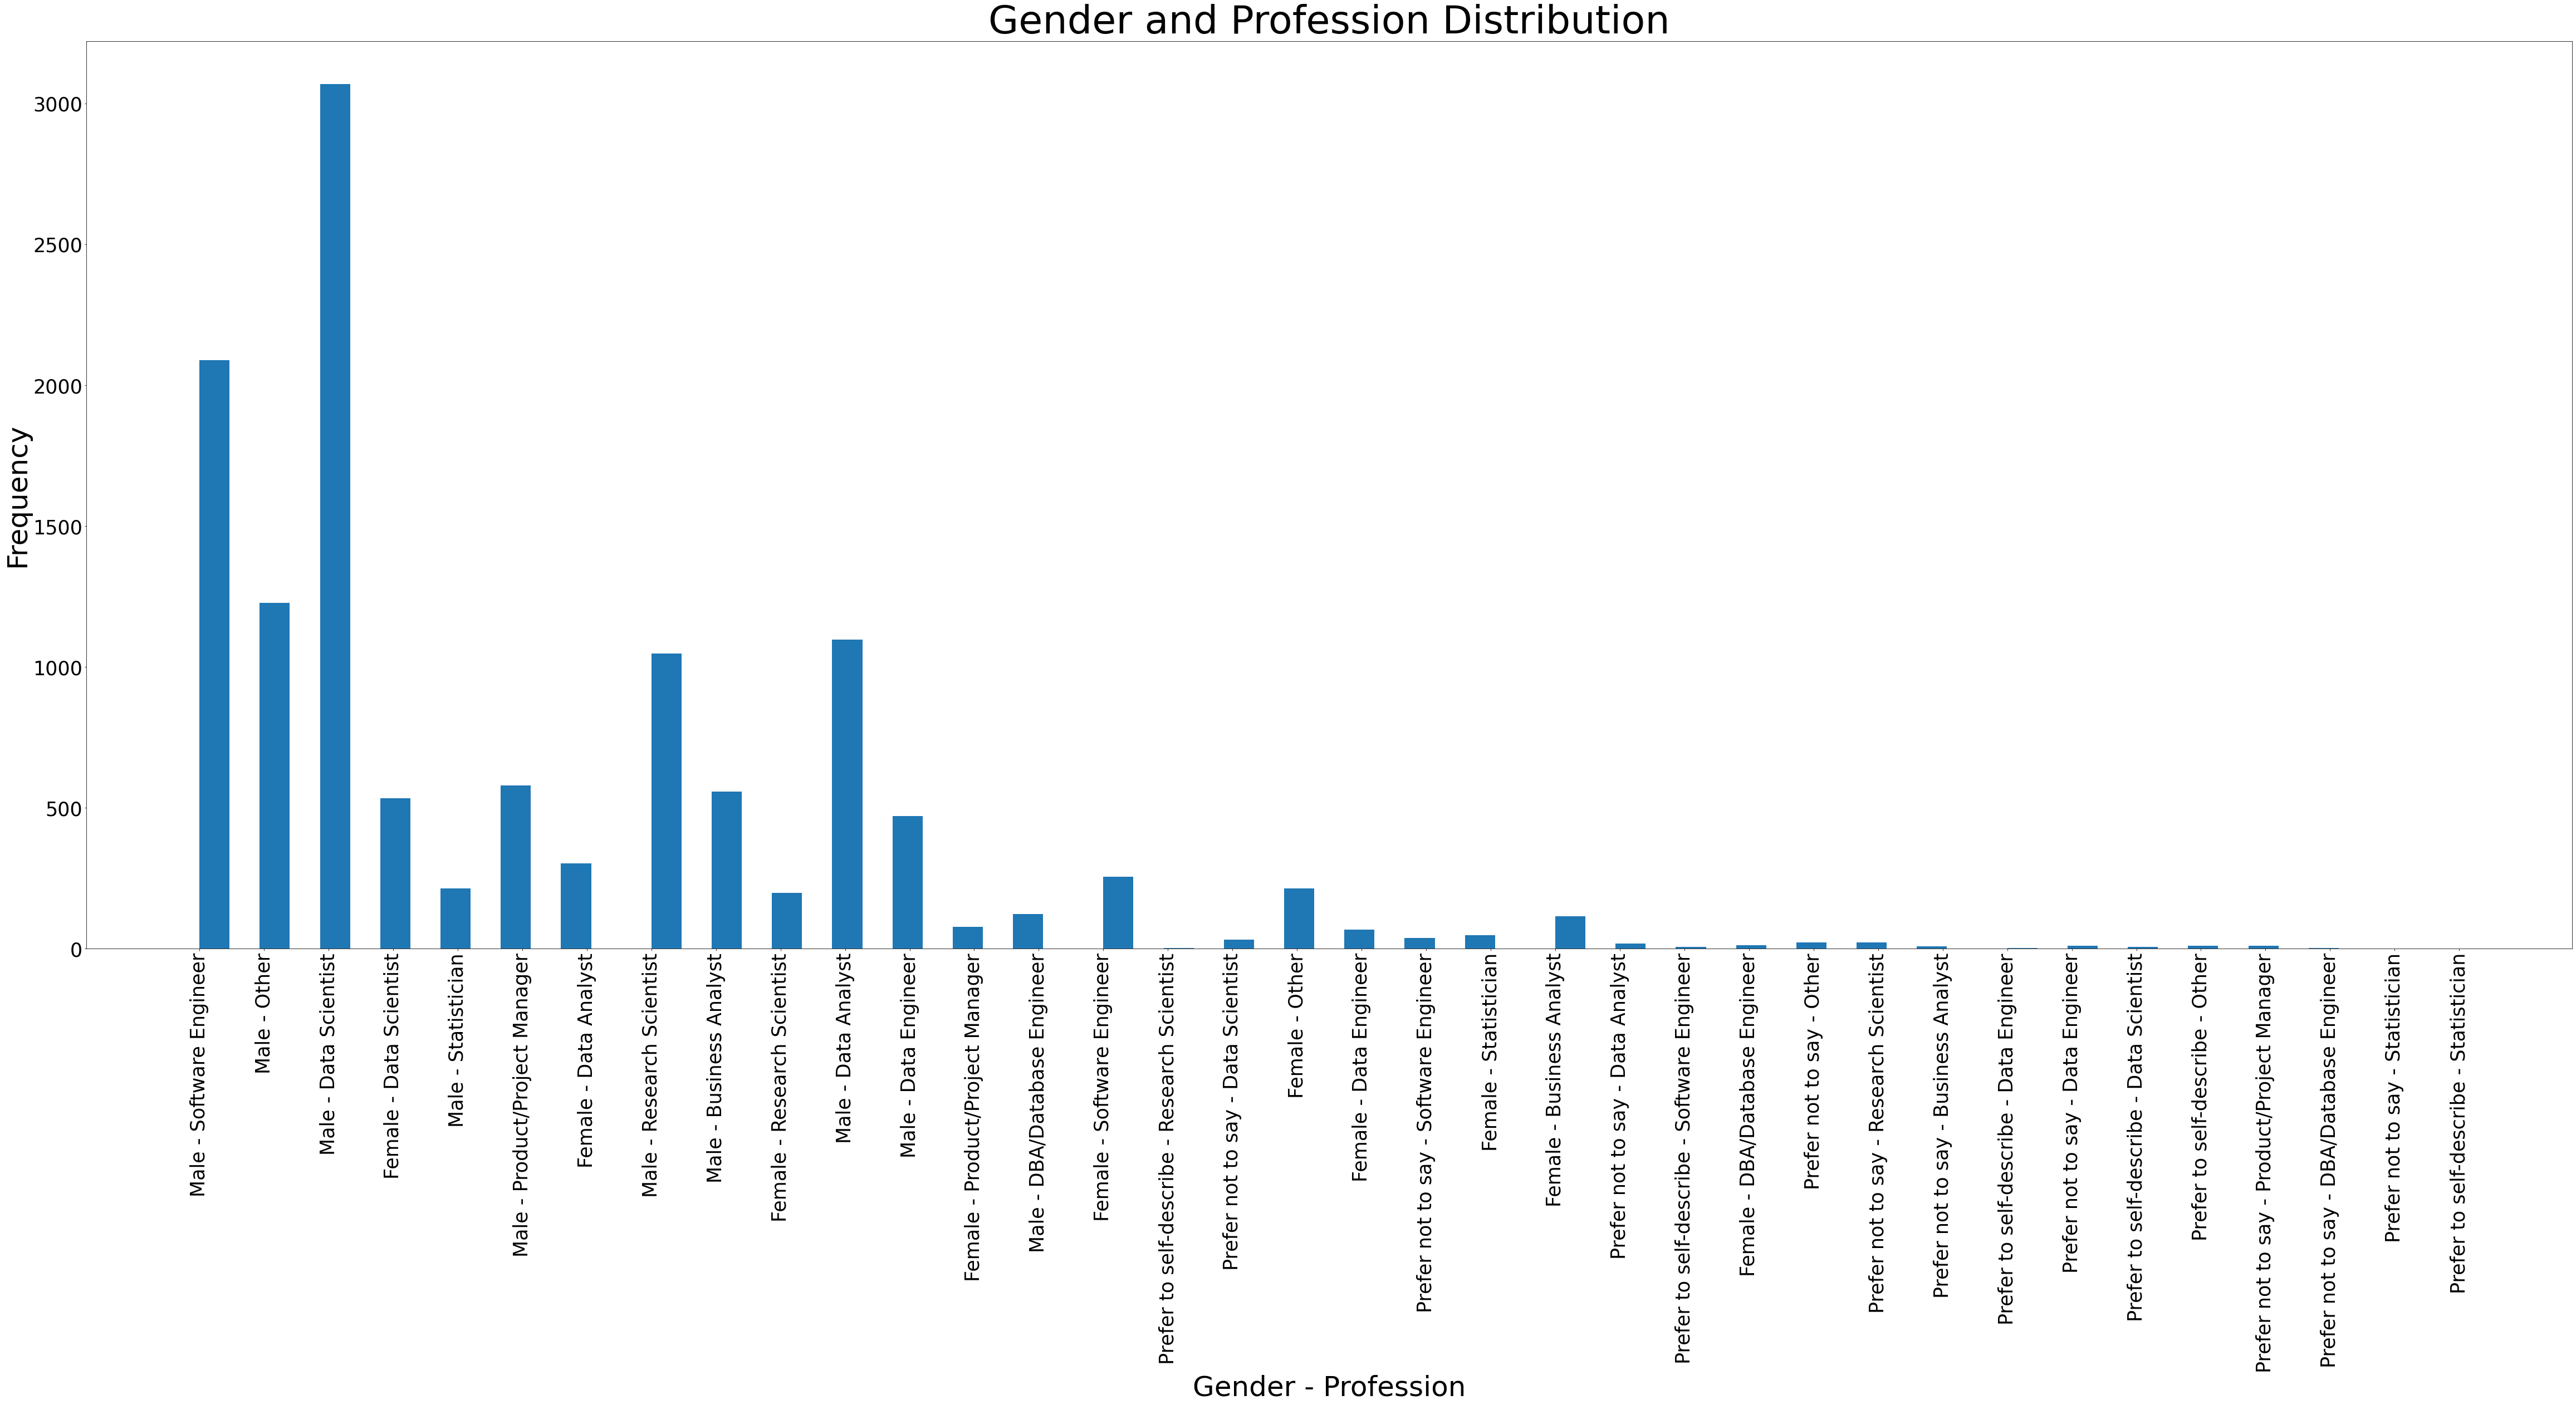

In [9]:
# Slicing the main data frame into gender and profession column
gender_profession=df_final[['Gender','Profession']]

#Converting them to array using numpy
gender_array1=gender_profession['Gender'].to_numpy()
profession_array1=gender_profession['Profession'].to_numpy()

#Final set of array
final_array=gender_array1 + ' - ' + profession_array1
print(final_array)

#Plotting the histogram graph
plt.figure(figsize=(80,30))
plt.hist(final_array,bins=75)
plt.xticks(fontsize=35,rotation=90)
plt.yticks(fontsize=35,rotation=0)
plt.title('Gender and Profession Distribution',fontsize=70)
plt.ylabel('Frequency',fontsize=50)
plt.xlabel('Gender - Profession',fontsize=50)
plt.show()

### Conclusion: Considering the distribution of  data science related profession, males are currently dominating this field wrt females in numbers.

In [10]:
#This data analysis is just to check the weightage of data science oriented profession.
# Data sciecne related profession counts in the dataset
other=df_final[['Profession']]  
other1=other.loc[other['Profession']== 'Other']
other2=other.loc[other['Profession']== 'Product/Project Manager']
other3=other.loc[other['Profession']== 'Software Engineer']
profession.info() #overall profession counts
other1.info()  #Other profession counts
other2.info()  #Product/Project Manager profession counts
other3.info()  #Software Engineer profesion counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12497 entries, 0 to 12496
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Profession  12497 non-null  object
dtypes: object(1)
memory usage: 97.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476 entries, 2 to 12494
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Profession  1476 non-null   object
dtypes: object(1)
memory usage: 23.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 667 entries, 10 to 12475
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Profession  667 non-null    object
dtypes: object(1)
memory usage: 10.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2390 entries, 0 to 12496
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pro

### Out of 12497 profession, data science related profession counts for ~67% of the total data 

In [11]:
#Second data analysis is wrt country and its salary distribution.
#Representation of the Country vs Salary distribution

#Slicing the column country and salary from main data set
Salary_Country_Graph=df_final[['Country','Salary']]
Salary_Country=df_final[['Country']]
def unique(Salary_Country):
    x5=np.array(Salary_Country)
    print(np.unique(x5)) 
unique(Salary_Country)    #List of all the countries

['Algeria' 'Argentina' 'Australia' 'Austria' 'Bangladesh' 'Belarus'
 'Belgium' 'Brazil' 'Canada' 'Chile' 'China' 'Colombia' 'Czech Republic'
 'Denmark' 'Egypt' 'France' 'Germany' 'Greece' 'Hong Kong (S.A.R.)'
 'Hungary' 'India' 'Indonesia' 'Iran, Islamic Republic of...' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Kenya' 'Malaysia' 'Mexico' 'Morocco'
 'Netherlands' 'New Zealand' 'Nigeria' 'Norway' 'Other' 'Pakistan' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Republic of Korea' 'Romania' 'Russia'
 'Saudi Arabia' 'Singapore' 'South Africa' 'South Korea' 'Spain' 'Sweden'
 'Switzerland' 'Taiwan' 'Thailand' 'Tunisia' 'Turkey' 'Ukraine'
 'United Kingdom of Great Britain and Northern Ireland'
 'United States of America' 'Viet Nam']


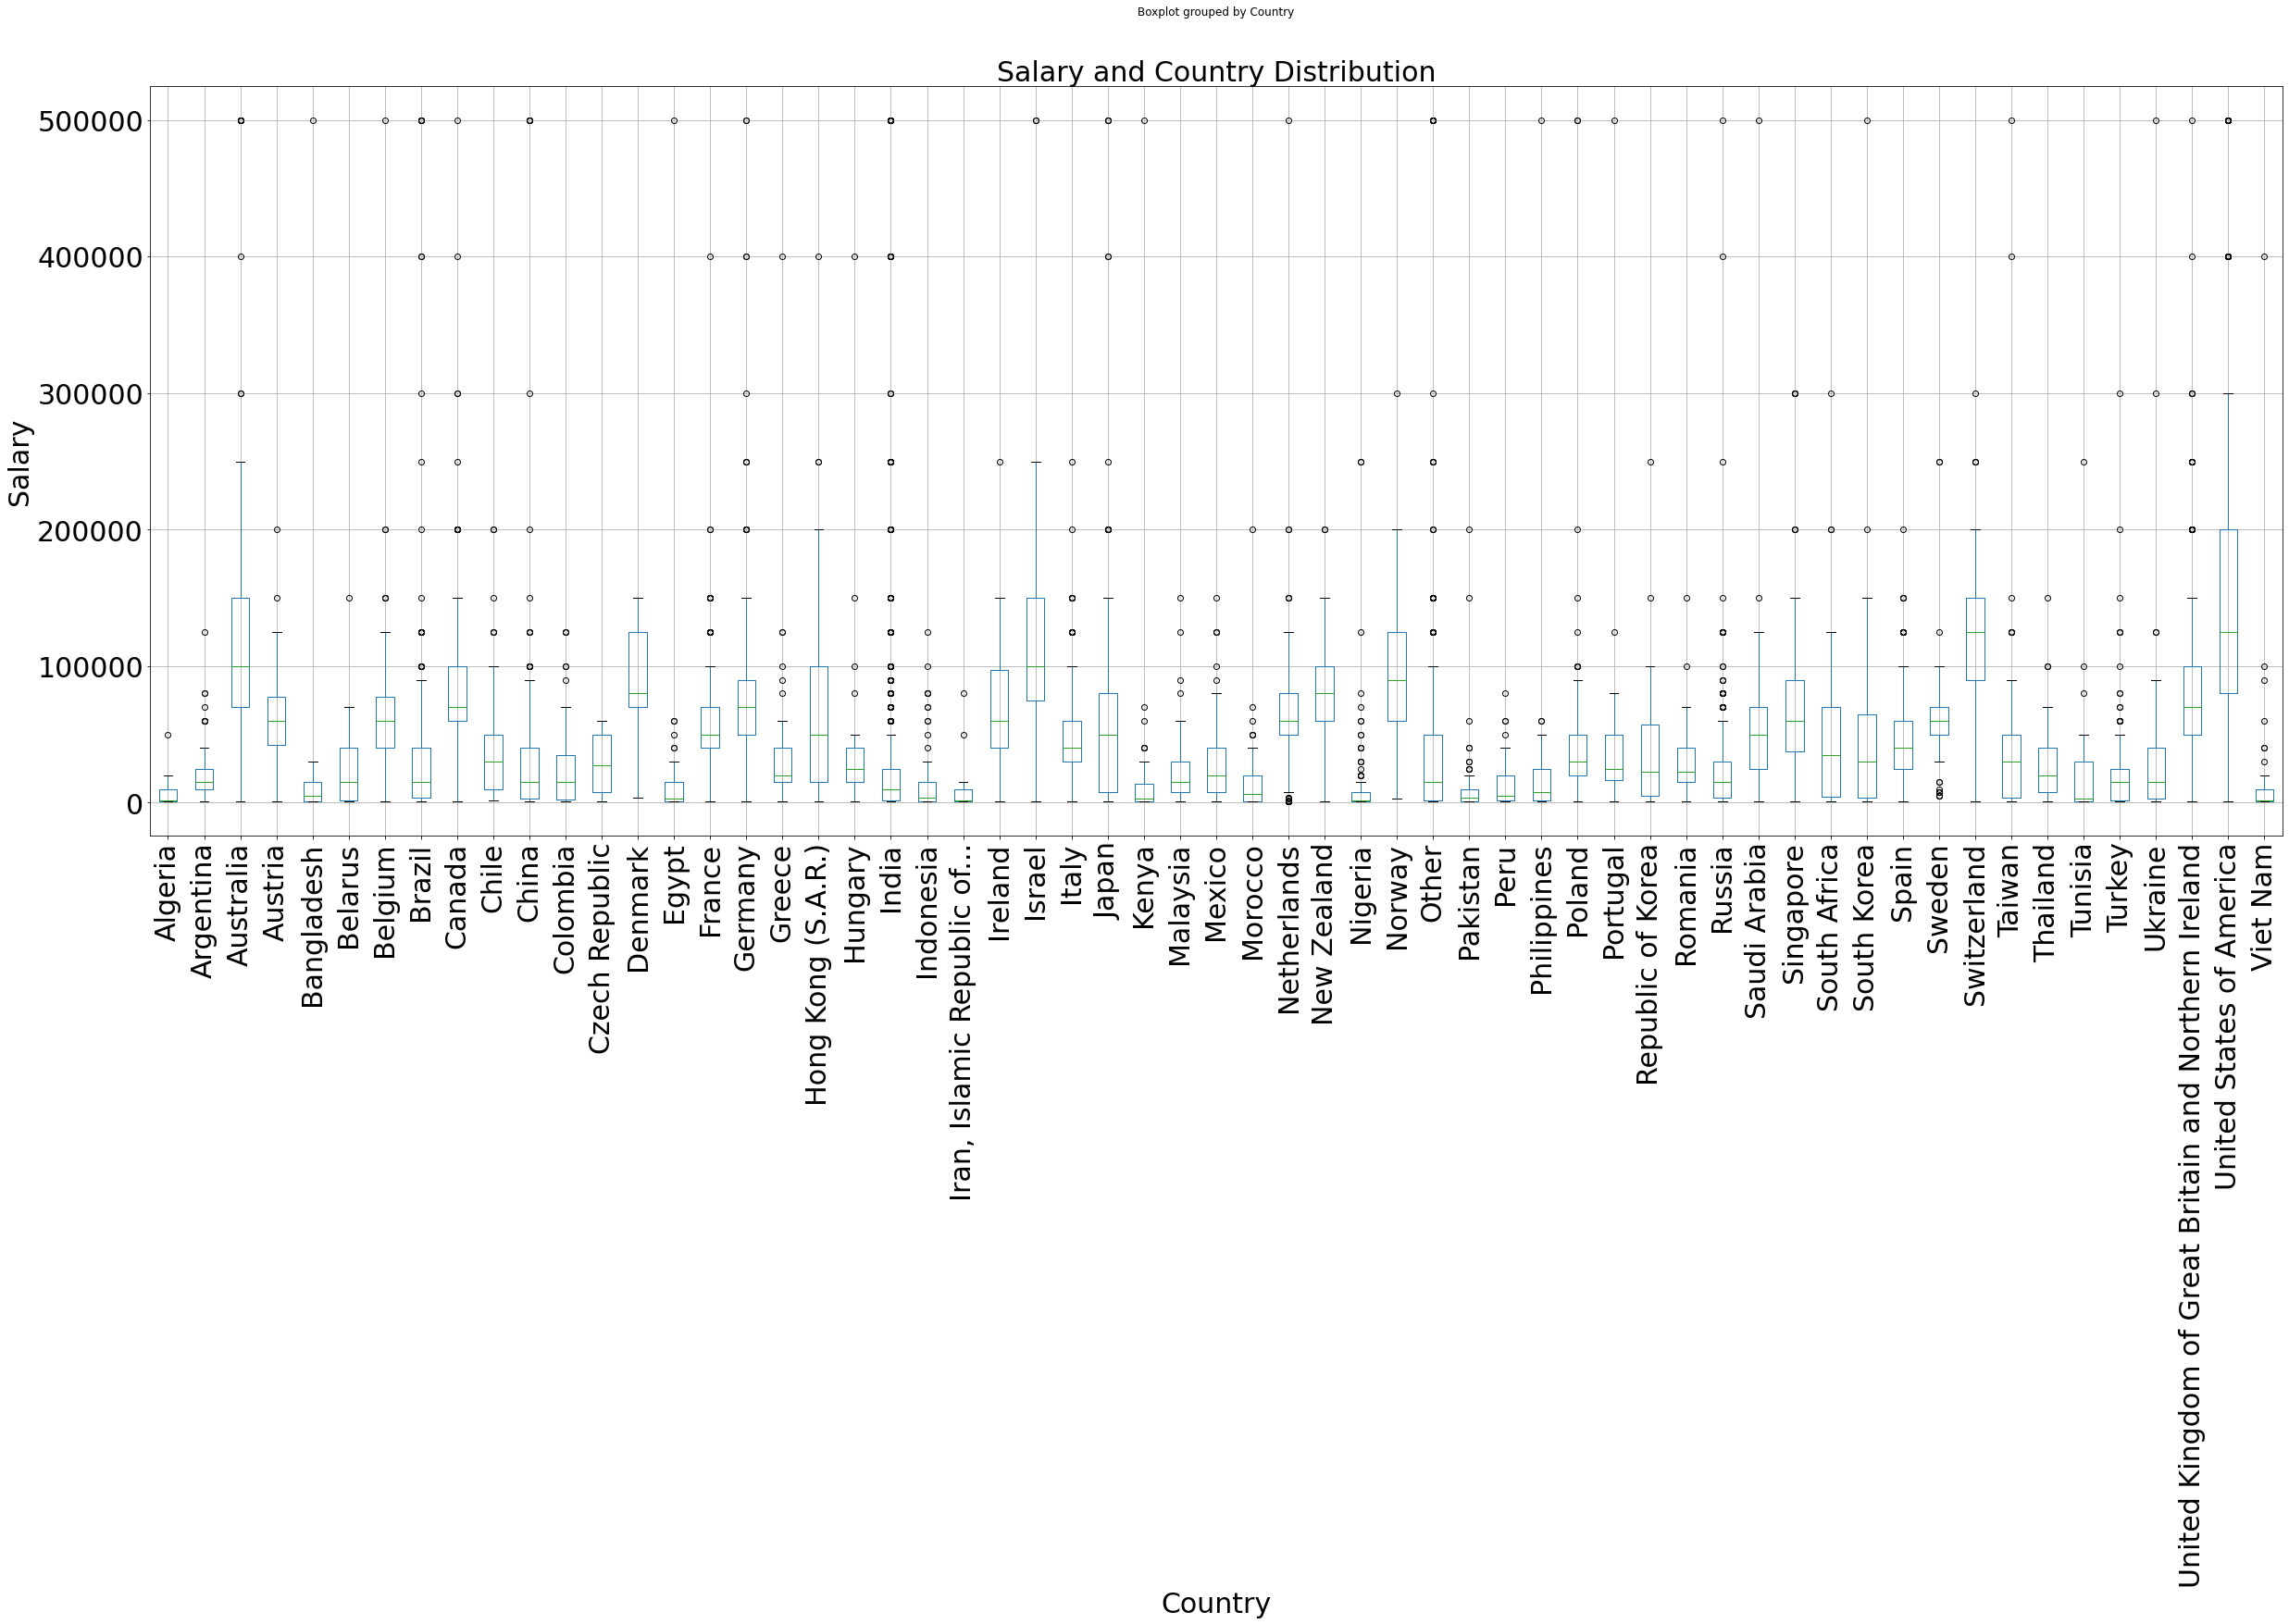

In [12]:
#Plotting graph

salary_country = pd.concat([Salary_Country_Graph])
salary_country.boxplot(column=['Salary'],by=['Country'], figsize=(40,15),rot=90,fontsize=30)
plt.title('Salary and Country Distribution',fontsize=30)
plt.ylabel('Salary',fontsize=30)
plt.xlabel('Country',fontsize=30)
plt.show()

### Conclusion: All the developed countries like USA,UK,Norway,Israel,Canada,Australia,Switzerland have more income level wrt to the data science oriented profession which is providing more oppurtunity for data scientist in future 

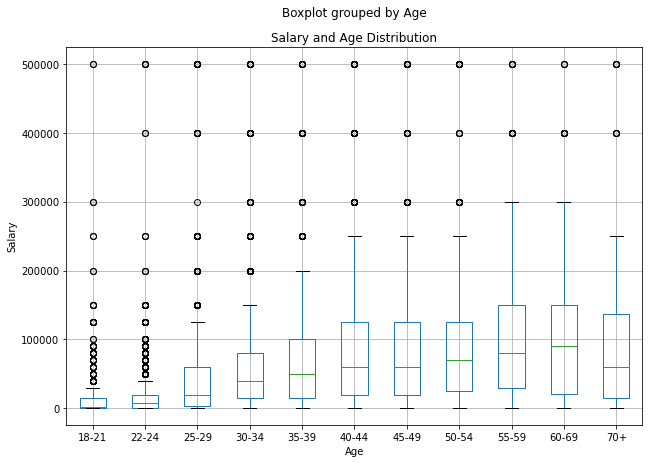

In [13]:
#Third data analysis is wrt age and salary distribution.
#Representation of the Age vs Salary distribution

Salary_Age_Graph=df_final[['Age','Salary']]

#PLotting graph
salary_age = pd.concat([Salary_Age_Graph])
salary_age.boxplot('Salary',by='Age',figsize=(10,7))
plt.title('Salary and Age Distribution')
plt.ylabel('Salary')
plt.show()

### Conclusion: Looking at the graph plotted, the median & average salary is getting increased as the age is increasing, so till age ~30 yrs, the young generation work force in data science profession are paid considerably low showing more number of people added up in the stream recently

## Question 2 

In [14]:
#Separating Male & Female salary figures

Male_salary= df_final.loc[df_final['Gender']=='Male']
Female_salary= df_final.loc[df_final['Gender']=='Female']

#Performing descritive Statistics from the database

print (Male_salary.describe(), Male_salary.info())
print(Female_salary.describe(),Female_salary.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10473 entries, 0 to 12496
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Country                            10473 non-null  object
 1   Age                                10473 non-null  object
 2   Profession                         10473 non-null  object
 3   Gender                             10473 non-null  object
 4   Highest Level Of Formal Education  10473 non-null  object
 5   Salary                             10473 non-null  int64 
 6   Professional Experience            9623 non-null   object
dtypes: int64(1), object(6)
memory usage: 654.6+ KB
              Salary
count   10473.000000
mean    58709.586556
std     74920.620048
min      1000.000000
25%      7500.000000
50%     30000.000000
75%     80000.000000
max    500000.000000 None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 6 to 12488
Data

In [15]:
# Making Subset data

male_salary = df_final.query('Gender == "Male"')['Salary']
female_salary = df_final.query('Gender == "Female"')['Salary']
df_final.groupby('Gender').describe()

Salary                                        \
                           count           mean            std     min   
Gender                                                                   
Female                    1827.0   45933.771210   60253.789591  1000.0   
Male                     10473.0   58709.586556   74920.620048  1000.0   
Prefer not to say          167.0   70664.670659   95027.634584  1000.0   
Prefer to self-describe     30.0  109783.333333  145801.097587  1000.0   

                                                              
                            25%      50%       75%       max  
Gender                                                        
Female                   3000.0  20000.0   70000.0  500000.0  
Male                     7500.0  30000.0   80000.0  500000.0  
Prefer not to say        5000.0  40000.0   90000.0  500000.0  
Prefer to self-describe  9375.0  75000.0  125000.0  500000.0

In [16]:
#Performing ttest using the groupping of subset created

salary_gender_ttest = pg.ttest(male_salary, female_salary, correction=False)
display(salary_gender_ttest)

T    dof       tail         p-val                CI95%  \
T-test  6.909348  12298  two-sided  5.108939e-12  [9151.36, 16400.27]   

        cohen-d       BF10  power  
T-test  0.17518  5.991e+08    1.0

### pval<0.05, thus rejecting null hypothesis as salary does depend on gender, though larger the sample, the more likely the difference of a given size will be, thus will be checking through bootstrap methodolgy.

In [17]:
# Changing data set to np arrays

female_salary_array= Female_salary['Salary'].to_numpy()
male_salary_array= Male_salary['Salary'].to_numpy()
print(male_salary_array, female_salary_array)


[ 40000   7500 300000 ...   1000   2000  70000] [ 90000 150000  25000 ...  25000  10000   5000]


In [18]:
#Bootstrapping the sample size

group= 1000 #number of times to re-sample

female_salary_bootstrap = []
male_salary_bootstrap =[]

for i in range(group):
    female_salary_avg= np.mean(female_salary_array[np.random.randint( len(female_salary_array),size= len(female_salary_array))])
    male_salary_avg= np.mean(male_salary_array[np.random.randint(len(male_salary_array),size= len(male_salary_array))])
    female_salary_bootstrap.append(female_salary_avg)
    male_salary_bootstrap.append(male_salary_avg)

Text(0.5, 1.0, 'bootstrapped distributions of salary')

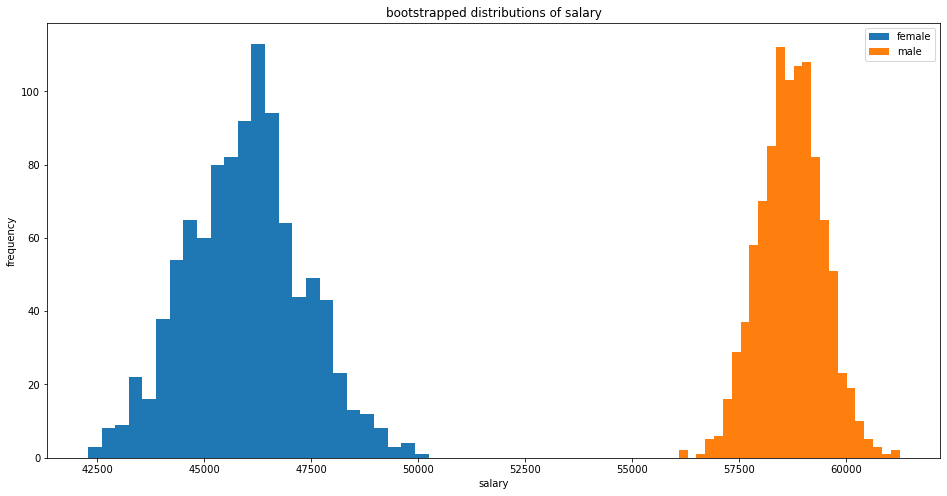

In [19]:
#Plotting graph
plt.figure(figsize=(16, 8))
plt.hist(female_salary_bootstrap, bins = 25,label = 'female', alpha = 1)
plt.hist(male_salary_bootstrap, bins = 25,label = 'male', alpha = 1)
plt.legend()
plt.xlabel('salary')
plt.ylabel('frequency')
plt.title('bootstrapped distributions of salary')

In [20]:
# Calculating difference in means
n_male_salary= len(male_salary_bootstrap)
n_female_salary= len(female_salary_bootstrap)

mu_male_salary = np.mean(male_salary_bootstrap)
mu_female_salary = np.mean(female_salary_bootstrap)
mu_salary_diff = mu_male_salary - mu_female_salary

var_male_salary = np.var(male_salary_bootstrap)
var_female_salary = np.var(female_salary_bootstrap)
var_salary_diff = var_male_salary/n_male_salary + var_female_salary/n_female_salary


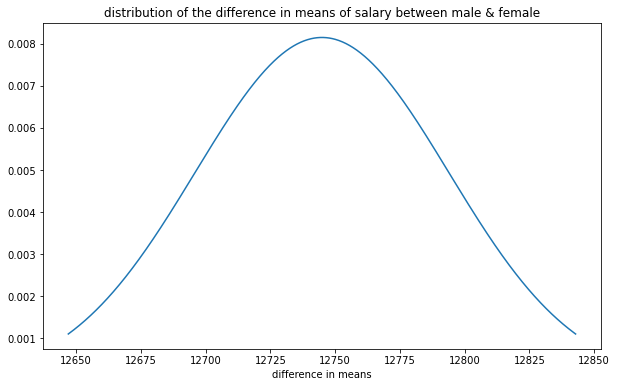

(12744.918057646704,
 48.953997399089886,
 12647.010062848525,
 12842.826052444883)

In [21]:
#Plot distribution 
plt.figure(figsize=(10, 6))
mu = mu_salary_diff
sigma = math.sqrt(var_salary_diff)
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 1000)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel('difference in means')
plt.title('distribution of the difference in means of salary between male & female')
plt.show()
mu,sigma,mu - 2*sigma, mu + 2*sigma #value between the confidence interval of 95% 

In [22]:
# Hypothesis Testing
ttest, pval= stats.ttest_ind(female_salary_bootstrap, male_salary_bootstrap)

if pval < 0.05:
    print(pval,"Reject null hypothesis")
else:
    print(pval,"Fail to reject null hypothesis")

0.0 Reject null hypothesis


### Conclusion: p < 0.05 (significance level) , Reject null hypothethis, the salary does depend upon the gender

## Question 3

In [23]:
# Separating Bachelor's degree , Doctoral degree and Master's degree from dataframe

bachelor_degree= df_final.loc[df_final['Highest Level Of Formal Education']=="Bachelor’s degree"]
print (bachelor_degree[['Highest Level Of Formal Education','Salary']])
doctoral_degree= df_final.loc[df_final['Highest Level Of Formal Education']=="Doctoral degree"]
print (doctoral_degree[['Highest Level Of Formal Education','Salary']])
master_degree= df_final.loc[df_final['Highest Level Of Formal Education']=="Master’s degree"]
print (master_degree[['Highest Level Of Formal Education','Salary']])

      Highest Level Of Formal Education  Salary
3                     Bachelor’s degree    5000
6                     Bachelor’s degree   90000
9                     Bachelor’s degree   80000
12                    Bachelor’s degree    1000
16                    Bachelor’s degree  150000
...                                 ...     ...
12488                 Bachelor’s degree    5000
12490                 Bachelor’s degree    1000
12492                 Bachelor’s degree   10000
12494                 Bachelor’s degree    1000
12496                 Bachelor’s degree   70000

[3361 rows x 2 columns]
      Highest Level Of Formal Education  Salary
14                      Doctoral degree   50000
22                      Doctoral degree    1000
33                      Doctoral degree  100000
47                      Doctoral degree    3000
53                      Doctoral degree   50000
...                                 ...     ...
12449                   Doctoral degree   70000
12452          

In [24]:
#Some descripting data for these groups

print(bachelor_degree.describe(),bachelor_degree.info())
print(doctoral_degree.describe(),doctoral_degree.info())
print(master_degree.describe(),master_degree.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3361 entries, 3 to 12496
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Country                            3361 non-null   object
 1   Age                                3361 non-null   object
 2   Profession                         3361 non-null   object
 3   Gender                             3361 non-null   object
 4   Highest Level Of Formal Education  3361 non-null   object
 5   Salary                             3361 non-null   int64 
 6   Professional Experience            3048 non-null   object
dtypes: int64(1), object(6)
memory usage: 210.1+ KB
              Salary
count    3361.000000
mean    44999.256174
std     67923.680798
min      1000.000000
25%      3000.000000
50%     15000.000000
75%     60000.000000
max    500000.000000 None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 14 to 12491
Data

Text(0.5, 1.0, 'Salary Vs Formal Education')

<Figure size 720x504 with 0 Axes>

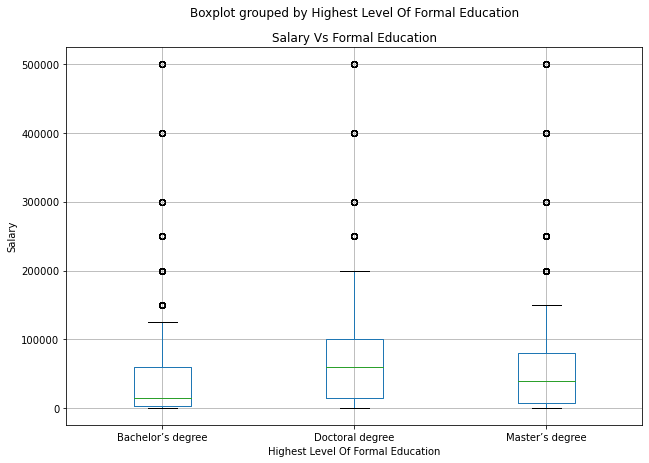

In [25]:
#Plotting the box graph for descriptive visualisation

plt.figure(figsize=(10,7))
salary_degree = pd.concat([bachelor_degree,doctoral_degree,master_degree])
salary_degree.boxplot('Salary',by='Highest Level Of Formal Education',figsize=(10,7))
plt.ylabel("Salary")
plt.title('Salary Vs Formal Education')


### ANOVA

In [26]:
#ttest is not used for comparing the means differences for more than 2 pararmeters,thus performing ANOVA methodolgy to check the hypothesis testing

# Changing df to np arrays

bachelor_salary_array= bachelor_degree['Salary'].to_numpy()
doctoral_salary_array= doctoral_degree['Salary'].to_numpy()
master_salary_array= master_degree['Salary'].to_numpy()
print(bachelor_salary_array, doctoral_salary_array,master_salary_array)



[ 5000 90000 80000 ... 10000  1000 70000] [ 50000   1000 100000 ...  15000  25000   1000] [ 40000 300000  70000 ...  10000  10000   2000]


In [27]:
#Bootstrapping the sample size

group= 1000 #number of times to re-sample

bachelor_salary_bootstrap = []
doctoral_salary_bootstrap =[]
master_salary_bootstrap =[]

for i in range(group):
    bachelor_salary_avg= np.mean(bachelor_salary_array[np.random.randint( len(bachelor_salary_array),size= len(bachelor_salary_array))])
    doctoral_salary_avg= np.mean(doctoral_salary_array[np.random.randint(len(doctoral_salary_array),size= len(doctoral_salary_array))])
    master_salary_avg= np.mean(master_salary_array[np.random.randint(len(master_salary_array),size= len(master_salary_array))])
    bachelor_salary_bootstrap.append(bachelor_salary_avg)
    doctoral_salary_bootstrap.append(doctoral_salary_avg)
    master_salary_bootstrap.append(master_salary_avg)

Text(0.5, 1.0, 'Bootstrapped distributions of salary')

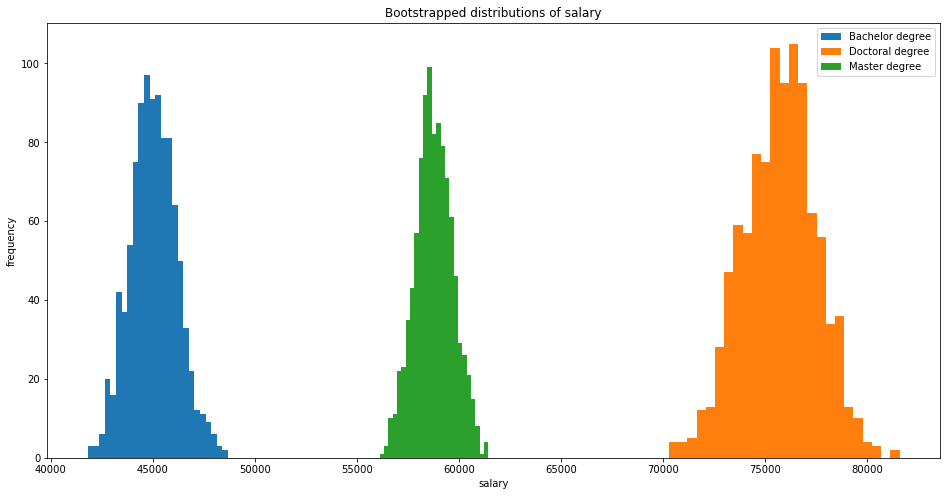

In [28]:
#Plotting graph
plt.figure(figsize=(16, 8))
plt.hist(bachelor_salary_bootstrap, bins = 25,label = 'Bachelor degree', alpha = 1)
plt.hist(doctoral_salary_bootstrap, bins = 25,label = 'Doctoral degree', alpha = 1)
plt.hist(master_salary_bootstrap, bins = 25,label = 'Master degree', alpha = 1)
plt.legend()
plt.xlabel('salary')
plt.ylabel('frequency')
plt.title('Bootstrapped distributions of salary')

In [29]:
#Hypothesis Testing

f,p = stats.f_oneway(bachelor_salary_bootstrap,doctoral_salary_bootstrap,master_salary_bootstrap)
print(f,p)

if p < 0.05:
    print(p,"Reject null hypothesis")
else:
    print(p,"Fail to reject null hypothesis")

130677.85157589393 0.0
0.0 Reject null hypothesis


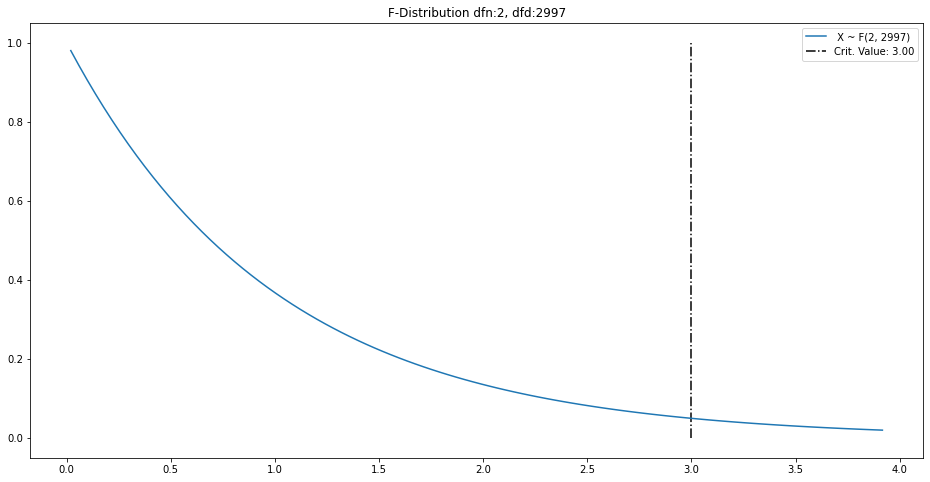

In [30]:
#Plotting graph

# comparing 3 different salaries
N = len(bachelor_salary_bootstrap)+len(doctoral_salary_bootstrap)+len(master_salary_bootstrap)
## number of groups
k = 3

dof_between = k-1
dof_within = N-k

from scipy.stats import f, norm
def plot_f_distrubiton():
    # Set figure 
    plt.figure(figsize=(16, 8))
    
    # Set degrees of freedom
    dfn, dfd = (k-1), (N-k)
    rejection_reg = f.ppf(q=.95, dfn=dfn, dfd=dfd)
    mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')
    
    x = np.linspace(f.ppf(0.02, dfn, dfd), 
                    f.ppf(0.98, dfn, dfd), 100)
    
    # Plot values
    plt.plot(x, f.pdf(x, dfn, dfd), alpha=1, 
             label=' X ~ F({}, {})'.format(dfn, dfd))
    plt.vlines(rejection_reg, 0.0, 1, 
               linestyles="dashdot", label="Crit. Value: {:.2f}".format(rejection_reg))
    plt.legend()
    plt.title('F-Distribution dfn:{}, dfd:{}'.format(dfn, dfd))
plot_f_distrubiton();

### Conclusion: p < 0.05 (significance level) at f value, Reject null hypothethis, the salary does depends upon the hgihest level of formal education. Also the f value is much more than the critical value (3), thus rejecting the null hypothesis.

In [31]:
# Calculating difference in means wrt different degrees
# Bachelor and Doctoral degree 

n_bachelor_salary= len(bachelor_salary_bootstrap)
n_doctoral_salary= len(doctoral_salary_bootstrap)

mu_bachelor_salary = np.mean(bachelor_salary_bootstrap)
mu_doctoral_salary = np.mean(doctoral_salary_bootstrap)
mu_degree_salary_diff1 = mu_doctoral_salary - mu_bachelor_salary

var_bachelor_salary = np.var(bachelor_salary_bootstrap)
var_doctoral_salary = np.var(doctoral_salary_bootstrap)
var_degree_salary_diff1 = var_bachelor_salary/n_bachelor_salary + var_doctoral_salary/n_doctoral_salary

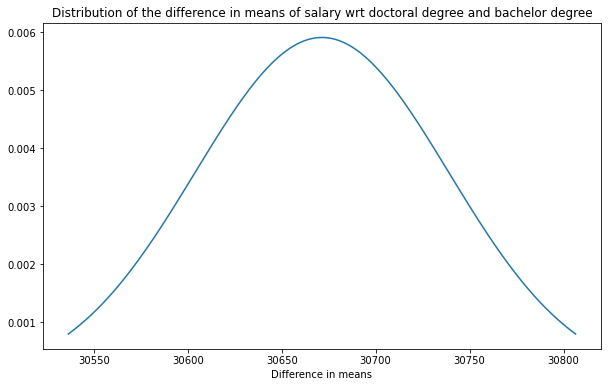

(30671.406005502387, 67.50321146699366, 30536.3995825684, 30806.412428436375)

In [32]:
#Plot distribution 
plt.figure(figsize=(10, 6))
mu_degree1 = mu_degree_salary_diff1
sigma1 = math.sqrt(var_degree_salary_diff1)
x1 = np.linspace(mu_degree1 - 2*sigma1, mu_degree1 + 2*sigma1, 1000)
plt.plot(x1, stats.norm.pdf(x1, mu_degree1, sigma1))
plt.xlabel('Difference in means')
plt.title('Distribution of the difference in means of salary wrt doctoral degree and bachelor degree')
plt.show()

mu_degree1,sigma1,mu_degree1 - 2*sigma1, mu_degree1 + 2*sigma1 #value between the confidence interval of 95%

In [33]:
# Bachelor and Doctoral degree 

n_master_salary= len(master_salary_bootstrap)
n_doctoral_salary= len(doctoral_salary_bootstrap)

mu_master_salary = np.mean(master_salary_bootstrap)
mu_doctoral_salary = np.mean(doctoral_salary_bootstrap)
mu_degree_salary_diff2 = mu_doctoral_salary - mu_master_salary

var_master_salary = np.var(master_salary_bootstrap)
var_doctoral_salary = np.var(doctoral_salary_bootstrap)
var_degree_salary_diff2 = var_master_salary/n_bachelor_salary + var_master_salary/n_doctoral_salary

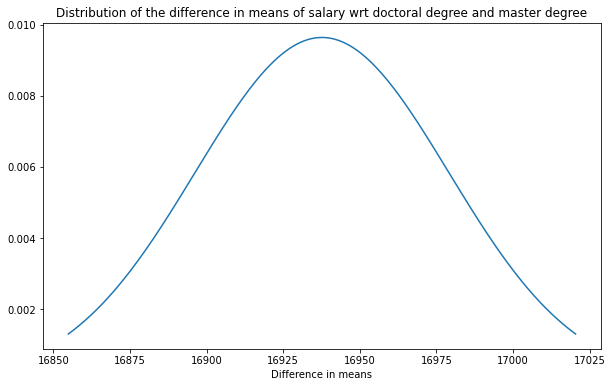

(16937.640942387174, 41.393257274858655, 16854.854427837457, 17020.42745693689)

In [34]:
#Plot distribution 
plt.figure(figsize=(10, 6))
mu_degree2 = mu_degree_salary_diff2
sigma2 = math.sqrt(var_degree_salary_diff2)
x2 = np.linspace(mu_degree2 - 2*sigma2, mu_degree2 + 2*sigma2, 1000)
plt.plot(x2, stats.norm.pdf(x2, mu_degree2, sigma2))
plt.xlabel('Difference in means')
plt.title('Distribution of the difference in means of salary wrt doctoral degree and master degree')
plt.show()

mu_degree2,sigma2,mu_degree2 - 2*sigma2, mu_degree2 + 2*sigma2 #value between the confidence interval of 95%

In [35]:
# Bachelor and Master degree 

n_bachelor_salary1= len(bachelor_salary_bootstrap)
n_master_salary1= len(master_salary_bootstrap)

mu_bachelor_salary1 = np.mean(bachelor_salary_bootstrap)
mu_master_salary1 = np.mean(master_salary_bootstrap)
mu_degree_salary_diff3 =  mu_master_salary1 - mu_bachelor_salary1

var_bachelor_salary1 = np.var(bachelor_salary_bootstrap)
var_master_salary1 = np.var(master_salary_bootstrap)
var_degree_salary_diff3 = var_bachelor_salary1/n_bachelor_salary1 + var_master_salary1/n_master_salary1



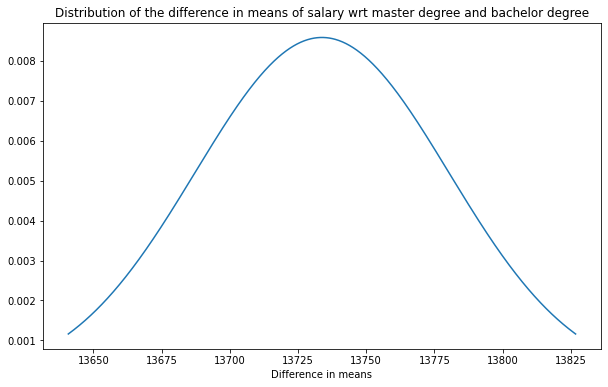

(13733.765063115214, 46.47040383109657, 13640.82425545302, 13826.705870777407)

In [36]:
#Plot distribution 
plt.figure(figsize=(10, 6))
mu_degree3 = mu_degree_salary_diff3
sigma3 = math.sqrt(var_degree_salary_diff3)
x3 = np.linspace(mu_degree3 - 2*sigma3, mu_degree3 + 2*sigma3, 1000)
plt.plot(x3, stats.norm.pdf(x3, mu_degree3, sigma3))
plt.xlabel('Difference in means')
plt.title('Distribution of the difference in means of salary wrt master degree and bachelor degree')
plt.show()


mu_degree3,sigma3,mu_degree3-2*sigma3,mu_degree3+2*sigma3 #value between the confidence interval of 95%

## Final conclusions: 
### 1. Women's contribution in data science and machine learning- The number of males is much more higher than the number of females that is performing data oriented profession. Except the 'Data Scientist' profession, females are really contibuting the same as of males. 
### 2. The effect of formal education is quite affecting the salary structure in the data science profession. Comparing the difference in means salary between bachelor, master and doctoral degree, it can cleary be seen that difference is quite high. Thus,  degree is propotional to salary.